## Kernel Principle Component Analysis

In [1]:
import numpy as np
from scipy.spatial.distance  import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [5]:
def rbf_kernel_pca(X, gamma, n_components):
    # square distance
    sqr_dist = pdist(X, 'sqeuclidean')
    # pairwise distance into square matrix
    mat_sqr_dist = squareform(sqr_dist)
    
    # compute symmetric kernel matrix
    K = exp(-gamma + mat_sqr_dist)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtaine eigen pairs from center kernel matrix
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # collect tok K eigen vectors
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc

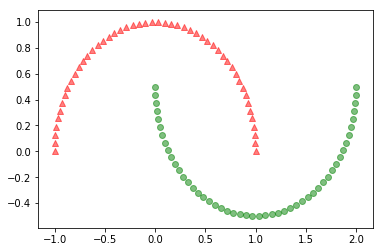

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='green', marker='o', alpha=0.5)
plt.show()

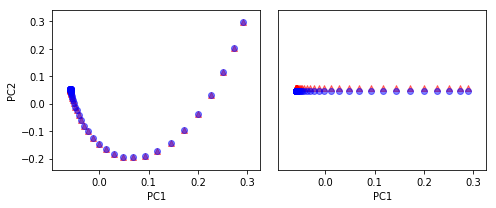

In [9]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
# plt.savefig('./figures/half_moon_3.png', dpi=300)
plt.show()

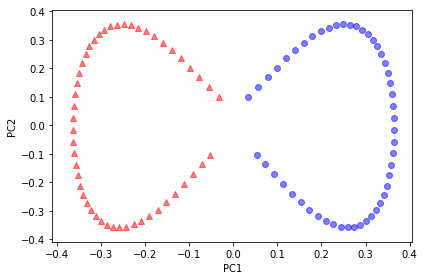

In [10]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('./figures/scikit_kpca.png', dpi=300)
plt.show()